In [4]:
#import Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# importing dataset path using pandas..
path ="http://bit.ly/w-data"
data=pd.read_csv(path)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#print the starting 5  records..
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
#print the ending 5 records...
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
# for Analyzing object series, as well as DataFrame we use describe method.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#information about the Student data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


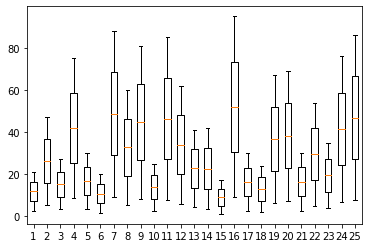

In [10]:
#defining the data as ploting graph.
plt.boxplot(data)
plt.show()


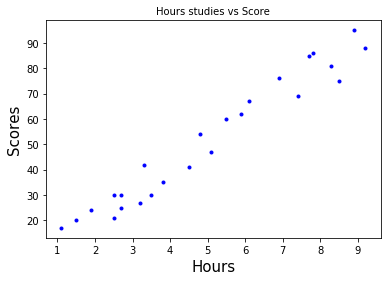

In [11]:
# Performing the visulazation operation on data...
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studies vs Score',fontsize=10)
plt.scatter(data.Hours, data.Scores, color='blue',marker='.')
plt.show()

In [12]:
x= data.iloc[:,:-1].values
y=data.iloc[:,1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [14]:
#Now we are train and test our data using Skitlearn.
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test =  train_test_split(x,y,random_state=0, test_size=0.2)

In [16]:
# Now we are training the model.
from sklearn.linear_model import LinearRegression
linreg =LinearRegression()

In [17]:
linreg.fit(X_train,Y_train)
print("Regression model has been trained")

Regression model has been trained


In [18]:
print(linreg.intercept_)

2.018160041434662


In [19]:
linreg.coef_

array([9.91065648])

In [27]:
Y1 =linreg.intercept_ + linreg.coef_ * X_train

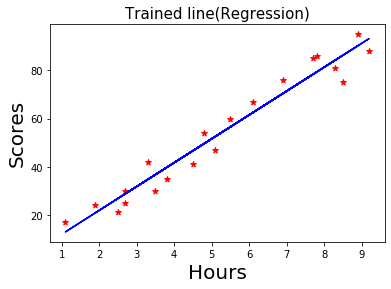

In [29]:
#plotting the line for  train data
plt.scatter(X_train,Y_train,color="red", marker='*')
plt.plot(X_train,Y1,color='blue')
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Scores",fontsize=20)
plt.title("Trained line(Regression)",fontsize=15)
plt.show()

In [31]:
#Now we are predicting the score for the given data
Y_pred=linreg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [32]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

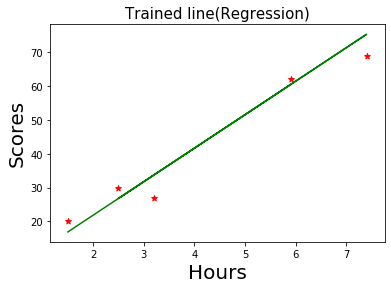

In [33]:
#plotting the line for  test data
plt.plot(X_test,Y_pred,color='green')
plt.scatter(X_test,Y_test,color='red',marker='*')
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Scores",fontsize=20)
plt.title("Trained line(Regression)",fontsize=15)
plt.show()

In [35]:
#Comparing the Real and predicted data(score)
Y_testdata = list(Y_test)
prediction_data=list(Y_pred)
df_compare = pd.DataFrame({ 'Real_Data':Y_testdata,'Result_Data':prediction_data})
df_compare

,Real_Data,Result_Data
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [43]:
# Algorithm accuracy for the given model
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105354

In [36]:
# predicting the Errors.
# For Predicting the errors regression will provide the three methods..
# 1. Mean Absolute error(MAE), 2. Mean Squared error(MSE), 3. Root Mean Squared error(RMSE)

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [45]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
MAE = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",RMSE)
print("Mean Absolute Error     = ",MAE)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


In [46]:
# predicting the Score for those student who studies 9.25 hours
Predicted_score = linreg.predict([[9.25]])
print("predicted score for those students who studies 9.25 hours :",Predicted_score)

predicted score for those students who studies 9.25 hours : [93.69173249]


...................SUMMARY FOR THIS MODEL...................

for the above predicted score , we can say that if any student will study for 9.25 hours then he will 
get 93.6 Marks in the result.





#  This Project is Completed ........Thank you..!